### Figure 3. Results from production multiobjective

**B. 3D plot with growth/cost/production. You will want to rotate this so original medium is shown**

* Plots the growth rate on the x-axis against medium cost on the y-axis against production rate on the z-axis for each candidate medium.
* Each dot is colour-coded according to the iteration it resulted from.
* the performance of the baseline medium is plotted onto the graph to allow for visual performance comparison
" Saves the figure as Figure3B.png

In [1]:
# imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import colormaps as cmaps

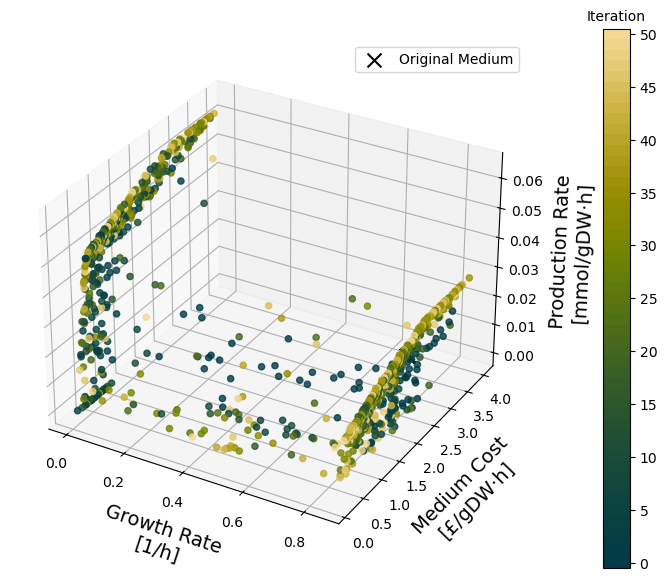

In [ ]:
#data = pd.read_csv("Figure3B_small.csv")
#figname = "Figure3B_small.png"
data = pd.read_csv("Figure3B.csv")
figname = "Figure3B.png"

# Create the plot with given size
fig = plt.figure(figsize = (9, 7))
axes = fig.add_subplot(projection = '3d')

# Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
n_start = data["n_start"][0]
n_batch = data["n_batch"][0]
n_candidates = data["n_candidates"][0]

"""
print("\nn_start = ", n_start, 
      "\nn_batch = ", n_batch, 
      "\nn_candidates = ", n_candidates,
      "\nlength = ", n_start + n_batch * n_candidates,
      "\nlen(data) = ", len(data))
"""

 # Generate distinct colours
colours = cmaps.bamako.cut(0.05, "right")(np.linspace(0, 1, n_batch + 1))
# Create a custom colourmap for the colour bar
cmap = mcolors.ListedColormap(colours)

# Create an array to store colours for each data point
point_colours = np.zeros(len(data), dtype = object)

# Assign first n_start points the same colour
point_colours[:n_start] = [colours[0]] * n_start
# Assign different colours to each batch
for i in range(n_batch):
    start_idx = n_start + i * n_candidates
    end_idx = start_idx + n_candidates
    point_colours[start_idx:end_idx] = [colours[i + 1]] * (end_idx - start_idx) # Assign a new color per batch
# Set boundaries between each batch, from -0.5 to n_batch + 0.5
boundaries = np.arange(n_batch + 2) - 0.5
norm = mcolors.BoundaryNorm(boundaries, cmap.N)

# transform cost data from 10^{-3} £/gDW·h to £/gDW·h
data["cost"] = data["cost"] * 1e-3
# Scatter plot with custom colours, applying transparence (alpha = 0.8)    
axes.scatter(
    data["growth_rate"],
    data["cost"],
    data["production"],
    c = point_colours, alpha = 0.8)


# Plot original medium for comparison
axes.scatter(
    data["init_growth_rate"][0],
    data["init_cost"][0] * 1e-3,
    data["init_production"],
    color = "black", marker = "x", 
    label = "Original Medium", s = 100, zorder = 5
    )


# axes
axes.set_xlabel("Growth Rate\n[1/h]", fontsize = 14, labelpad = 12)
axes.set_ylabel("Medium Cost\n[£/gDW·h]", fontsize = 14, labelpad = 12)
axes.set_zlabel("Production Rate\n[mmol/gDW·h]", fontsize = 14, labelpad = 12)
axes.xaxis.set_tick_params(width = 2, labelsize = 10)
axes.yaxis.set_tick_params(width = 2, labelsize = 10)
axes.zaxis.set_tick_params(width = 2, labelsize = 10)
"""
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_linewidth(1.5)
axes.spines["left"].set_linewidth(1.5)
"""
# Add the color bar
tick_positions = np.arange(0, n_batch + 1, 5)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axes, ticks = tick_positions, pad = 0.11) # pad defines distance
cbar.ax.set_title("Iteration", fontsize = 10)
cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks at colour boundaries
    
# Display the legend
axes.legend()
    
# Show the plot
plt.show()

fig.set_size_inches(9, 7)  # Consistent physical size in inches
fig.savefig(figname, dpi = 300, bbox_inches = None)